In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers,models
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [3]:
mnist=tf.keras.datasets.mnist

## Creating folder "Images" in my local machine

In [4]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
base_pth=(os.getcwd())
images_path=os.path.join(base_pth,"Images")
os.makedirs(images_path,exist_ok=True)

 ## Downloading MNIST dataset

In [5]:
def dwnld_mnist(images, labels, set_name):
    for i, (image, label) in enumerate(zip(images, labels)):
        label_dir = os.path.join(images_path, set_name, str(label))
        os.makedirs(label_dir, exist_ok=True)
        image_path = os.path.join(label_dir, f"{i}.png")
        img = Image.fromarray(image)
        img.save(image_path)

## Downloading training_data_set

In [6]:
dwnld_mnist(train_images,train_labels,"train")
train_images.shape,train_labels.shape

((60000, 28, 28), (60000,))

## Downloading testing_data_set

In [7]:
dwnld_mnist(test_images,test_labels,"test")
test_images.shape,test_labels.shape

((10000, 28, 28), (10000,))

In [8]:
print(np.unique(train_labels)),print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


(None, None)

In [9]:
print(train_images[0].shape)

(28, 28)


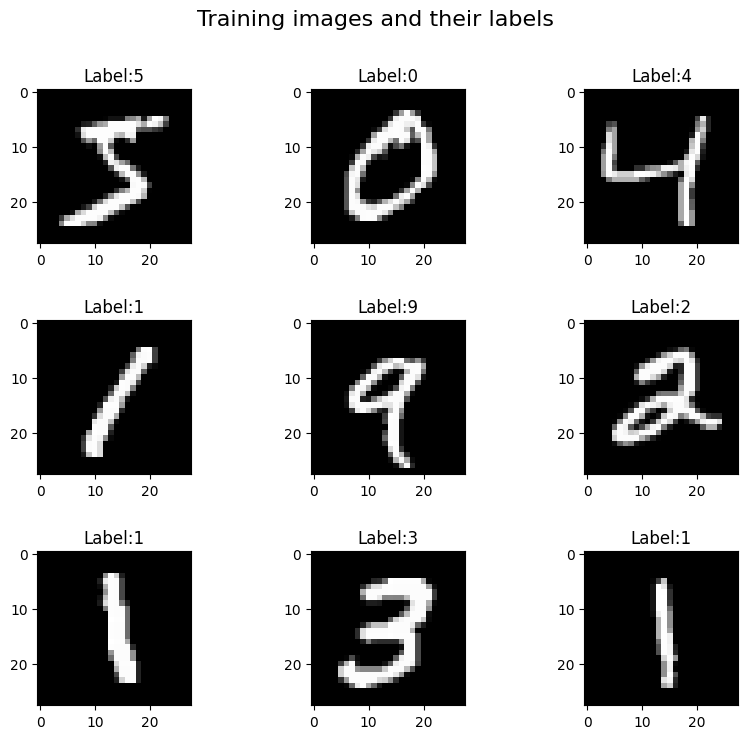

In [10]:
plt.figure(figsize=(10,8))
plt.suptitle("Training images and their labels", fontsize=16)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i],cmap="gray")
    plt.title(f"Label:{train_labels[i]}")
    plt.subplots_adjust(hspace=0.5)
plt.show()

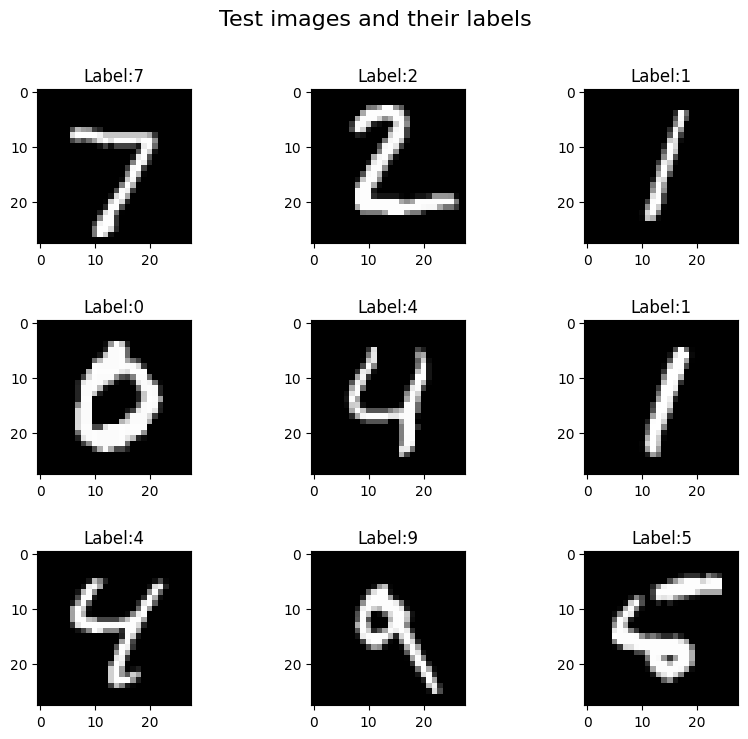

In [12]:
plt.figure(figsize=(10,8,))
plt.suptitle("Test images and their labels", fontsize=16)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[i],cmap="gray")
    plt.title(f"Label:{test_labels[i]}")
    plt.subplots_adjust(hspace=0.5)
plt.show()

In [51]:
nrml_train_images=train_images/255
nrml_test_images=test_images/255

In [52]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Conv2D(256, (3, 3), activation='relu',input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

In [53]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [54]:
model_training=model.fit(nrml_train_images,train_labels,
          epochs=5,
          validation_data=(nrml_test_images, test_labels),          
          )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.8959 - loss: 0.3295 - val_accuracy: 0.9774 - val_loss: 0.0691
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9824 - loss: 0.0563 - val_accuracy: 0.9815 - val_loss: 0.0535
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.9867 - val_loss: 0.0443
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9805 - val_loss: 0.0679
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9956 - loss: 0.0146 - val_accuracy: 0.9849 - val_loss: 0.0520


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,282 (465.95 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 79,522 (310.64 KB)

##  Accuracy on Training data

In [55]:
loss,accuracy=model.evaluate(train_images,train_labels)
print(accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8563 - loss: 247.1711
0.8568500280380249


## Accuracy on Test data  

In [26]:
loss,accuracy=model.evaluate(test_images,test_labels)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 17.8109
0.9736999869346619


## Accuracy(%) vs Loss on training data

Text(0, 0.5, 'Percentage')

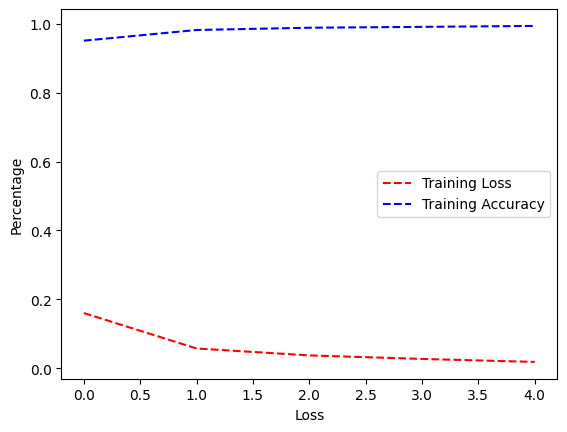

In [56]:
plt.plot(model_training.history["loss"],'r--')
plt.plot(model_training.history["accuracy"],'b--')
plt.legend(['Training Loss', 'Training Accuracy'])
plt.xlabel("Loss")
plt.ylabel("Percentage")

# epochs(10) vs deafault batch_size(32)


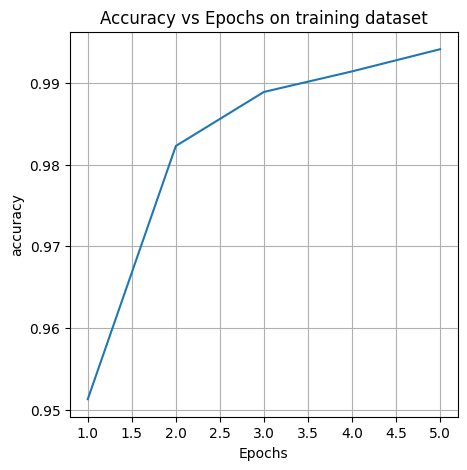

In [57]:
accuracies=[]
accuracies=model_training.history["accuracy"]
epochs=range(1,len(accuracies)+1)
plt.figure(figsize=(5,5))
plt.title("Accuracy vs Epochs on training dataset")
plt.plot(epochs,accuracies)
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

In [58]:
def model_training(batch_size):
    model.fit(nrml_train_images,
          train_labels,epochs=5,
          validation_data=(nrml_test_images, test_labels),
          batch_size=batch_size,
         
          )
    return model.history


In [59]:
batches=[16,32,64,128,256]
model_accuracies=[]
md_batch_acu=[]
mdl_batch=[]
for batch_size in batches:
    print(f"For batch size:{batch_size}")
    mdl_hist=model_training(batch_size)
    md_batch_acu.append(mdl_hist.history["accuracy"][-1])
    

For batch size:16
Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 122s 32ms/step - accuracy: 0.9919 - loss: 0.0245 - val_accuracy: 0.9829 - val_loss: 0.0581
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 121s 32ms/step - accuracy: 0.9955 - loss: 0.0128 - val_accuracy: 0.9815 - val_loss: 0.0683
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 124s 33ms/step - accuracy: 0.9965 - loss: 0.0109 - val_accuracy: 0.9818 - val_loss: 0.0710
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 124s 33ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accuracy: 0.9843 - val_loss: 0.0696
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 127s 34ms/step - accuracy: 0.9973 - loss: 0.0090 - val_accuracy: 0.9860 - val_loss: 0.0674
For batch size:32
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9988 - loss: 0.0032 - val_accuracy: 0.9863 - val_loss: 0.0704
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9998 - loss: 9.1883e-04 - val_accuracy: 0.9836 - val_loss: 0.0909
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━

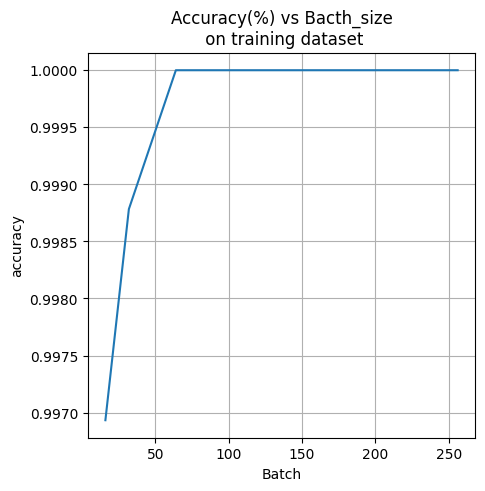

In [60]:
epochs=range(1,len(md_batch_acu)+1)
plt.figure(figsize=(5,5))
plt.title("Accuracy(%) vs Bacth_size\n on training dataset")
plt.plot(batches,md_batch_acu)
plt.xlabel("Batch")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

## Model prediction for training data_set

In [61]:
train_label_pre=model.predict(nrml_train_images)
train_label_pre

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step


array([[2.86280679e-25, 1.61887815e-19, 8.11815648e-26, ...,
        4.27714104e-16, 1.35283640e-24, 1.36456262e-13],
       [1.00000000e+00, 1.65005801e-27, 1.18203384e-15, ...,
        1.21505364e-26, 9.61953357e-19, 2.62633187e-14],
       [1.58932133e-29, 5.55208787e-12, 5.26466711e-16, ...,
        2.46899299e-19, 4.56845698e-17, 1.67010439e-15],
       ...,
       [1.02793304e-30, 1.62265530e-27, 3.33196859e-31, ...,
        1.44416603e-28, 2.28389136e-25, 5.28527790e-14],
       [1.35973597e-20, 1.17137979e-26, 1.48425655e-28, ...,
        3.03079850e-37, 1.45525762e-23, 4.74998030e-29],
       [3.14503918e-19, 1.36027966e-29, 6.15067630e-24, ...,
        8.20957194e-23, 1.00000000e+00, 1.34703636e-19]], dtype=float32)

In [62]:
train_label_pre_classes=np.argmax(train_label_pre,axis=1)

In [63]:
cm=confusion_matrix(train_labels,train_label_pre_classes)
cm

array([[5923,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6742,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5958,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6131,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5842,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5421,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5918,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6265,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5851,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5949]],
      dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix(TrainingDataSet)')

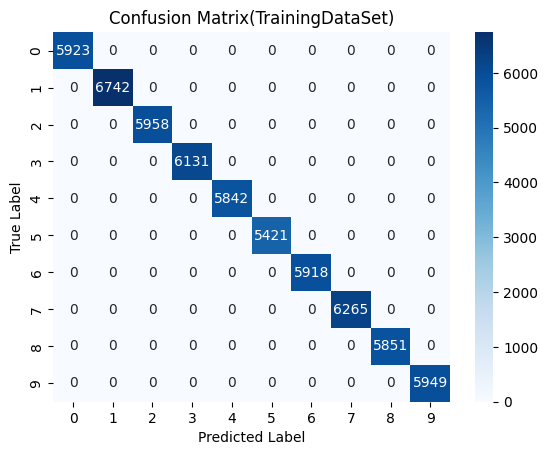

In [64]:
plt=sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.set_xlabel('Predicted Label')
plt.set_ylabel('True Label')
plt.set_title('Confusion Matrix(TrainingDataSet)')

## Model prediction for test_data

In [65]:
predicted = model.predict(nrml_test_images)
predicted,predicted.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


(array([[2.6559899e-24, 1.2814748e-17, 5.1476154e-17, ..., 1.0000000e+00,
         1.6541511e-16, 3.5164519e-18],
        [9.7126555e-23, 2.6209524e-18, 1.0000000e+00, ..., 5.9321465e-26,
         1.0584985e-21, 9.5388531e-26],
        [5.2423342e-19, 1.0000000e+00, 2.4547502e-16, ..., 3.5180772e-17,
         2.0738751e-17, 1.4267329e-18],
        ...,
        [8.0974716e-32, 1.6203362e-19, 5.3150208e-21, ..., 4.2226585e-21,
         6.8987599e-18, 5.0304238e-17],
        [9.1764885e-22, 1.6383370e-25, 1.7826294e-25, ..., 1.0591754e-24,
         5.8499983e-15, 5.0227412e-22],
        [5.5241523e-22, 8.8704859e-27, 4.4550497e-29, ..., 8.8234621e-37,
         3.1456204e-23, 3.8113004e-31]], dtype=float32),
 (10000, 10))

## Convert the pridiction to class label

In [69]:
predicted_classes = np.argmax(predicted, axis=1)

In [70]:
cm=confusion_matrix(test_labels,predicted_classes)
cm

array([[ 973,    0,    3,    0,    0,    0,    3,    1,    0,    0],
       [   0, 1130,    1,    2,    0,    0,    0,    1,    1,    0],
       [   1,    0, 1021,    0,    0,    0,    1,    6,    2,    1],
       [   0,    0,    1,  999,    0,    6,    0,    2,    2,    0],
       [   1,    0,    1,    0,  968,    0,    4,    0,    0,    8],
       [   1,    0,    0,    5,    0,  882,    2,    0,    2,    0],
       [   3,    2,    0,    0,    3,    5,  943,    0,    2,    0],
       [   0,    2,    7,    1,    0,    0,    0, 1012,    2,    4],
       [   3,    0,    3,    0,    2,    2,    1,    3,  958,    2],
       [   0,    1,    0,    1,    6,    3,    0,    5,    1,  992]],
      dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix(testingDataSet)')

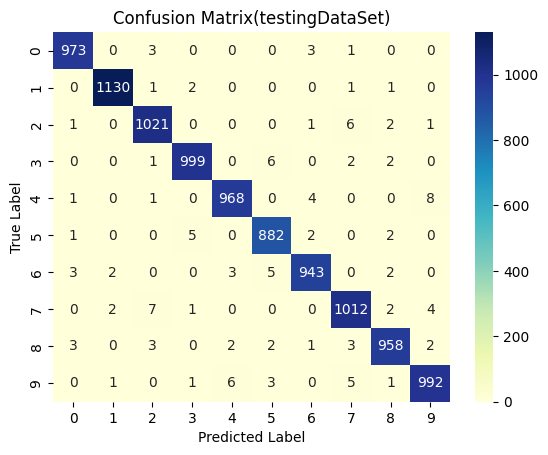

In [71]:
ax = sns.heatmap(cm, annot=True,cmap='YlGnBu',fmt="d" )
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix(testingDataSet)')

## Building Predictive system

In [75]:
input_image_path=input("input_image_path")
input_image=cv2.imread(input_image_path)

grayScaleImage=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayScaleImage,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,([1,28,28]))
input_prediction=model.predict(image_reshaped)
np.argmax(input_prediction)
print("Predicted correctly",np.argmax(input_prediction))

input_image_path input_4.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted correctly 4


## Misclassified imagese

In [89]:

predicted_classes = np.where(y_pred != y_test)[0]

# Select 5 misclassified instances
misclassified_samples = predicted_classes[:5]

# Create a DataFrame to show misclassified samples with true and predicted labels
misclassified_df = pd.DataFrame({
    'True Label': y_test[misclassified_samples],
    'Predicted Label': y_pred[misclassified_samples]
}, index=misclassified_samples)

print("Misclassified Samples:")
print(misclassified_df)



Misclassified Samples:
     True Label  Predicted Label
18            3                5
247           4                2
321           2                7
340           5                3
447           4                9


Misclassified Samples:
     True Label  Predicted Label
18            3                5
247           4                2
321           2                7
340           5                3
447           4                9


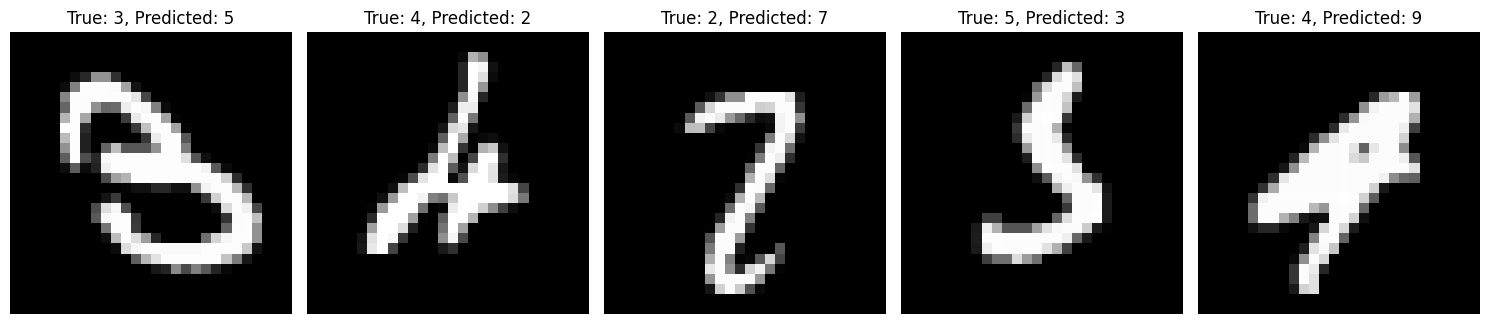

In [85]:
misclassified_indices = np.where(y_pred != y_test)[0]

# Select 5 misclassified instances
misclassified_samples = misclassified_indices[:5]
                                                        
# Create a DataFrame to show misclassified samples with true and predicted labels
misclassified_df = pd.DataFrame({        
    'True Label': y_test[misclassified_samples],
    'Predicted Label': y_pred[misclassified_samples]
}, index=misclassified_samples)

print("Misclassified Samples:")
print(misclassified_df)

# Display misclassified images
plt.figure(figsize=(15, 7))
for i, sample_idx in enumerate(misclassified_samples):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[sample_idx], cmap='gray')  # Assuming grayscale images
    plt.title(f'True: {y_test[sample_idx]}, Predicted: {y_pred[sample_idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()
